**Day 1 - Convolution and FFT examples**

Average Filtering

--2021-02-19 17:29:06--  https://static.dw.com/image/49972010_303.jpg
Resolving static.dw.com (static.dw.com)... 96.16.157.66, 2a02:26f0:4300:1bf::2d63, 2a02:26f0:4300:19f::2d63
Connecting to static.dw.com (static.dw.com)|96.16.157.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59402 (58K) [image/jpeg]
Saving to: ‘Picture1.jpg’

Picture1.jpg        100%[===================>]  58.01K   283KB/s    in 0.2s    

2021-02-19 17:29:07 (283 KB/s) - ‘Picture1.jpg’ saved [59402/59402]



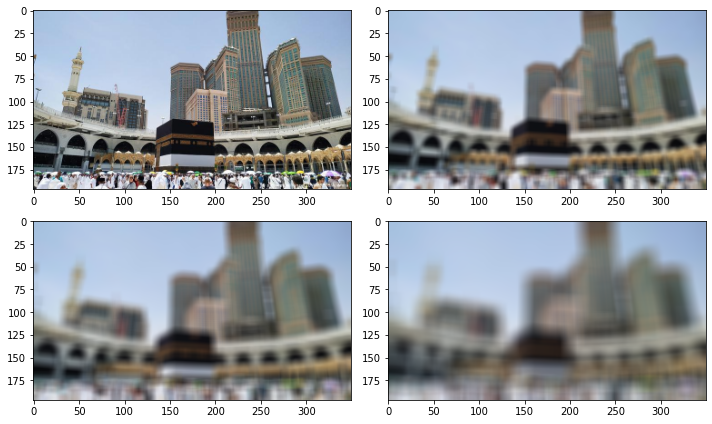

In [38]:
!wget -O Picture1.jpg https://static.dw.com/image/49972010_303.jpg

import cv2
import numpy as np
import matplotlib.pyplot as plt

Irgb = cv2.imread('Picture1.jpg');
Irgb = cv2.resize(Irgb, (0,0), fx=0.5, fy=0.5)

h = np.ones((7, 7), np.float32)/(7*7)
I7 = cv2.filter2D(Irgb, -1, kernel=h)

h = np.ones((11, 11), np.float32)/(11*11)
I11 = cv2.filter2D(Irgb, -1, kernel=h)

h = np.ones((19, 19), np.float32)/(19*19)
I19 = cv2.filter2D(Irgb, -1, kernel=h)

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow( cv2.cvtColor(Irgb, cv2.COLOR_BGR2RGB) )
ax[0,1].imshow( cv2.cvtColor(I7, cv2.COLOR_BGR2RGB) )
ax[1,0].imshow( cv2.cvtColor(I11, cv2.COLOR_BGR2RGB) )
ax[1,1].imshow( cv2.cvtColor(I19, cv2.COLOR_BGR2RGB) )
plt.tight_layout()

Edge Detection

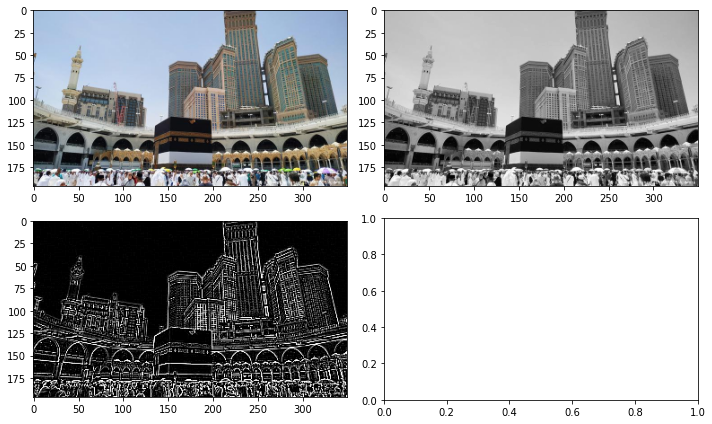

In [41]:
Igray = cv2.cvtColor(Irgb, cv2.COLOR_BGR2GRAY)

h = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
Iedge = cv2.filter2D(Igray, -1, kernel=h)

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow( cv2.cvtColor(Irgb, cv2.COLOR_BGR2RGB) )
ax[0,1].imshow( Igray, cmap='gray' )
ax[1,0].imshow( Iedge, cmap='gray' )
plt.tight_layout()

Motion

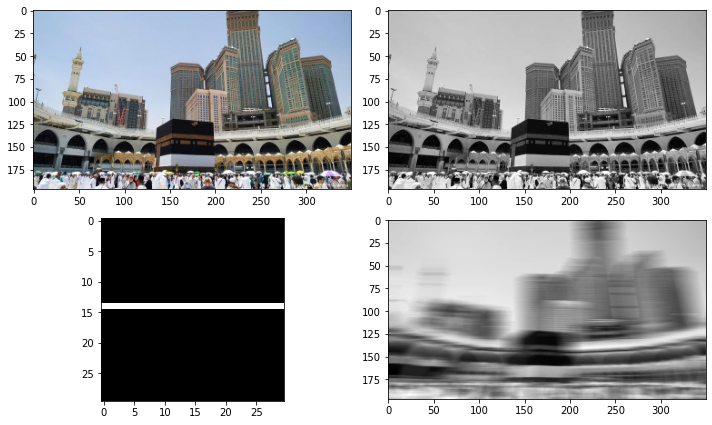

In [42]:
size = 30
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

Imotion = cv2.filter2D(Igray, -1, kernel=kernel_motion_blur)

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow( cv2.cvtColor(Irgb, cv2.COLOR_BGR2RGB) )
ax[0,1].imshow( Igray, cmap='gray' )
ax[1,0].imshow( kernel_motion_blur, cmap='gray' )
ax[1,1].imshow( Imotion, cmap='gray' )
plt.tight_layout()

2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT. 

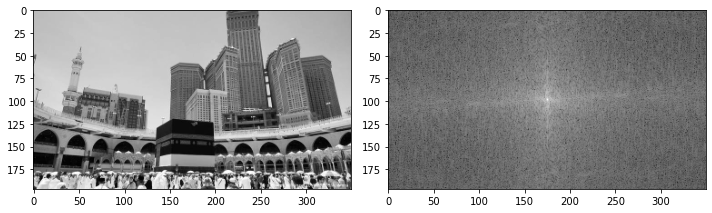

In [89]:
f = np.fft.fft2(Igray)
fshift = np.fft.fftshift(f)  # zero frequency component (DC component) is on top left corner, bring it to center
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow( Igray, cmap='gray' )
ax[1].imshow( magnitude_spectrum, cmap='gray' )
plt.tight_layout()

Inverse FFT

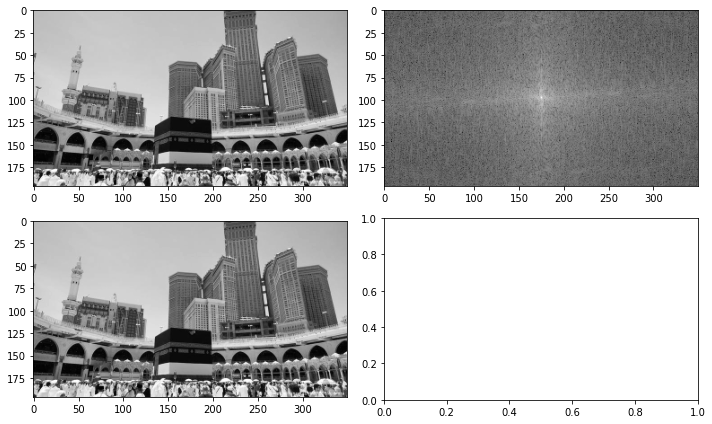

In [91]:
img_back  = np.fft.ifft2(fshift)
img_back  = abs(img_back)

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow( Igray, cmap='gray' )
ax[0,1].imshow( magnitude_spectrum, cmap='gray' )
ax[1,0].imshow( img_back, cmap='gray' )
plt.tight_layout()

Changing frequency domain

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


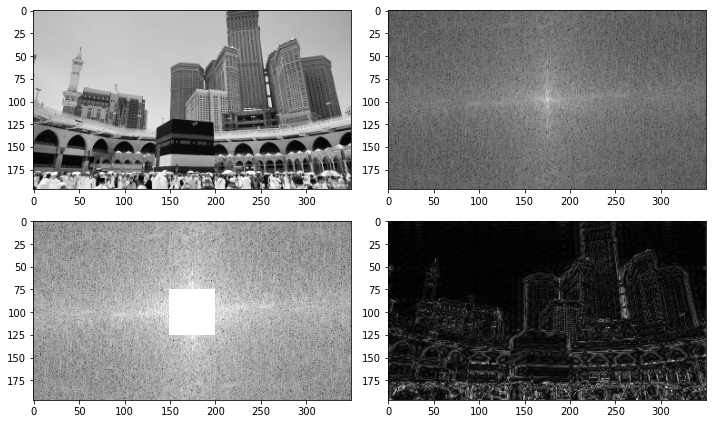

In [93]:
fshift_updated = fshift.copy()
fshift_updated[75:125, 150:200] = 0 +0j
magnitude_spectrum_new = 20*np.log(np.abs(fshift_updated))

img_back_updated = np.fft.ifft2(fshift_updated)
img_back_updated = np.abs(img_back_updated)

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow( Igray, cmap='gray' )
ax[0,1].imshow( magnitude_spectrum, cmap='gray' )
ax[1,0].imshow( magnitude_spectrum_new, cmap='gray' )
ax[1,1].imshow( img_back_updated, cmap='gray' )
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


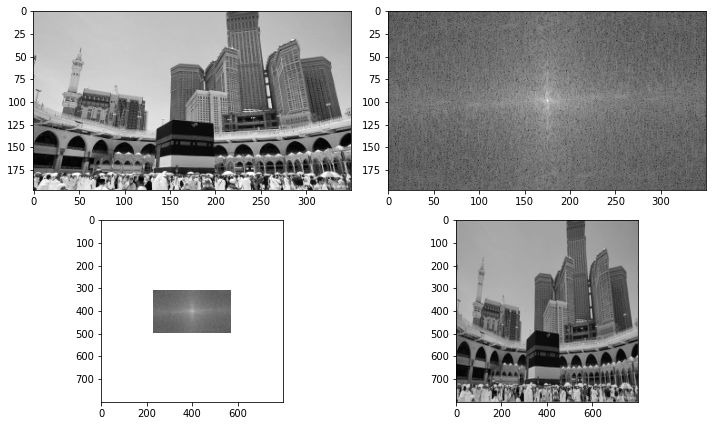

In [96]:
fshift_new = np.zeros((800,800), dtype=complex)
rows = int(fshift.shape[0]/2)
cols = int(fshift.shape[1]/2)
fshift_new[400-rows:400+rows+1, 400-cols:400+cols] = fshift
magnitude_spectrum_new = 20*np.log(np.abs(fshift_new))

img_back_new = np.fft.ifft2(fshift_new)
img_back_new = np.abs(img_back_new)

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].imshow( Igray, cmap='gray' )
ax[0,1].imshow( magnitude_spectrum, cmap='gray' )
ax[1,0].imshow( magnitude_spectrum_new, cmap='gray' )
ax[1,1].imshow( img_back_new, cmap='gray' )
plt.tight_layout()